# Multiple Linear Regression, Regression Trees, and Random Forest

Practice the application of these three techniques on the Credit and Auto datasets

Compare their performance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from abess import abessLm

In [3]:
import statsmodels.formula.api as smf

In [4]:
from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Credit dataset

In [6]:
Credit_df= pd.read_csv('C:\\Users\\jheredi2\\Documents\\PythonDataAnalytics\\1-Datasets\\Credit_ISLR.csv')

In [7]:
Credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   ID          400 non-null    int64  
 2   Income      400 non-null    float64
 3   Limit       400 non-null    int64  
 4   Rating      400 non-null    int64  
 5   Cards       400 non-null    int64  
 6   Age         400 non-null    int64  
 7   Education   400 non-null    int64  
 8   Gender      400 non-null    object 
 9   Student     400 non-null    object 
 10  Married     400 non-null    object 
 11  Ethnicity   400 non-null    object 
 12  Balance     400 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 40.8+ KB


In [8]:
Credit_df.drop(['Unnamed: 0','ID'],axis=1,inplace=True)

In [9]:
Credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


As we already know, Gender, Student, Married, and Ethnicity are qualitative predictors. We need to convert them into quantitative ones by creating dummy variables from them.

As we already discussed in a previous session, when we apply linear regression, we need to drop one category from the qualitative predictor when creating the dummies (i.e., number of dummies = number of categories in the qualitative predictor - 1). This is MUST do in linear regression.

However, when we apply other techniques like Regression and Classification trees, the recommendation to drop one category does not hold anymore (at least, doing so is not strongly recommended). There is a healthy debate about in which cases to drop one category from a qualitative predictor. Here I leave you two references in case you want to delve into it:

https://datascience.stackexchange.com/questions/27957/why-do-we-need-to-discard-one-dummy-variable

https://datascience.stackexchange.com/questions/47638/in-which-cases-shouldnt-we-drop-the-first-level-of-categorical-variables

In class, to keep things simple, we are going to keep dropping the first category of a qualitative predictor for any technique (linear regresison, regression trees, etc).

In [10]:
Credit_df_dummies=pd.get_dummies(Credit_df,columns=['Gender','Student','Married','Ethnicity'], drop_first=True)
Credit_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               400 non-null    float64
 1   Limit                400 non-null    int64  
 2   Rating               400 non-null    int64  
 3   Cards                400 non-null    int64  
 4   Age                  400 non-null    int64  
 5   Education            400 non-null    int64  
 6   Balance              400 non-null    int64  
 7   Gender_Female        400 non-null    uint8  
 8   Student_Yes          400 non-null    uint8  
 9   Married_Yes          400 non-null    uint8  
 10  Ethnicity_Asian      400 non-null    uint8  
 11  Ethnicity_Caucasian  400 non-null    uint8  
dtypes: float64(1), int64(6), uint8(5)
memory usage: 24.0 KB


__Optional:__ If you want to move the outcome variable (Balance) to the last column of the dataframe, you can do the following:

In [11]:
Credit_df_dummies = Credit_df_dummies[ [ col for col in Credit_df_dummies.columns if col != 'Balance' ] + ['Balance'] ]

In [12]:
Credit_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               400 non-null    float64
 1   Limit                400 non-null    int64  
 2   Rating               400 non-null    int64  
 3   Cards                400 non-null    int64  
 4   Age                  400 non-null    int64  
 5   Education            400 non-null    int64  
 6   Gender_Female        400 non-null    uint8  
 7   Student_Yes          400 non-null    uint8  
 8   Married_Yes          400 non-null    uint8  
 9   Ethnicity_Asian      400 non-null    uint8  
 10  Ethnicity_Caucasian  400 non-null    uint8  
 11  Balance              400 non-null    int64  
dtypes: float64(1), int64(6), uint8(5)
memory usage: 24.0 KB


### Multiple Linear Regression

#### Apply ABESS using the whole dataset to select the best predictors to include in a multiple linear regression model

In this exercise, the goal is ONLY to select the predictors. We do not have to worry about what the coefficients for these predictors are. Only the names of the predictors.

In [13]:
# We have 11 predictors so .... range (12)

model_credit_abess = abessLm(support_size = range(12)) 

In [14]:
# Creating an array with the predictors

Xs_array= np.array(Credit_df_dummies.iloc[:,:-1])

In [15]:
y_array= np.array(Credit_df_dummies['Balance'])

In [16]:
model_credit_abess.fit(Xs_array, y_array)

abessLm(always_select=[], support_size=range(0, 12))

In [17]:
non_zero_indexes = model_credit_abess.coef_!=0

In [18]:
selected_predictors= Credit_df_dummies.iloc[:,:-1].columns[non_zero_indexes]
selected_predictors

Index(['Income', 'Rating', 'Student_Yes'], dtype='object')

##### Split the data in training and testing (80-20 split)

In [19]:
X_train, X_test, y_train, y_test= train_test_split (Credit_df_dummies.iloc[:,:-1], Credit_df_dummies['Balance'], test_size=0.2, random_state=1)

#### Use the predictors obtained from ABESS to obtain the equation from the training data. 

#### Then, use this equation to obtain the root MSE on the test data

#### Option 1: Use scikit-learn

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
multiple_reg_credit1= LinearRegression(fit_intercept=True)

In [22]:
multiple_reg_credit1.fit(X_train[selected_predictors], y_train)

# multiple_reg_credit1.fit(X_train[[Income', 'Rating', 'Student_Yes']], y_train)

LinearRegression()

In [23]:
# Root test MSE (option 1)

np.sqrt (mean_squared_error( y_test, multiple_reg_credit1.predict (X_test[selected_predictors])))

121.19916532104996

In [24]:
# Root test MSE (option 2)

mean_squared_error( y_test, multiple_reg_credit1.predict (X_test[selected_predictors]), squared=False)

121.19916532104996

In [25]:
Credit_df_dummies['Balance'].describe()

count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64

In [26]:
mean_squared_error( y_test, multiple_reg_credit1.predict (X_test[selected_predictors]), squared=False)/Credit_df_dummies['Balance'].mean()

0.23306859479255398

In [27]:
mean_squared_error( y_test, multiple_reg_credit1.predict (X_test[selected_predictors]), squared=False)/Credit_df_dummies['Balance'].median()

0.26376314542121865

#### Option 2: Use Statsmodels

In [28]:
Credit_df_dummies_training= pd.concat([X_train,y_train], axis=1)

In [29]:
Credit_df_dummies_training.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian,Balance
93,16.479,5435,388,2,26,16,0,0,0,0,0,937
23,64.027,5179,398,5,48,8,0,0,1,0,0,411
299,24.919,5051,372,3,76,11,1,0,1,0,0,711
13,43.682,6922,511,1,49,9,0,0,1,0,1,1081
90,20.191,5767,431,4,42,16,0,0,1,0,0,1023


In [30]:
Credit_df_dummies_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320 entries, 93 to 37
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               320 non-null    float64
 1   Limit                320 non-null    int64  
 2   Rating               320 non-null    int64  
 3   Cards                320 non-null    int64  
 4   Age                  320 non-null    int64  
 5   Education            320 non-null    int64  
 6   Gender_Female        320 non-null    uint8  
 7   Student_Yes          320 non-null    uint8  
 8   Married_Yes          320 non-null    uint8  
 9   Ethnicity_Asian      320 non-null    uint8  
 10  Ethnicity_Caucasian  320 non-null    uint8  
 11  Balance              320 non-null    int64  
dtypes: float64(1), int64(6), uint8(5)
memory usage: 21.6 KB


In [31]:
multiple_reg_credit2= smf.ols('Balance~'+ '+'.join(selected_predictors), data=Credit_df_dummies_training)

In [32]:
# Root test MSE

mean_squared_error( y_test,multiple_reg_credit2.fit().predict(X_test[selected_predictors]), squared=False)

121.19916532104304

### Regression Trees

#### Use post-prunning via CCP to fit a tree to the training data

#### Then, use this tree to obtain the root MSE on the test data

In [33]:
reg_tree_credit_unprunned= DecisionTreeRegressor(random_state=1)

In [34]:
path= reg_tree_credit_unprunned.cost_complexity_pruning_path(X_train, y_train)

In [35]:
alphas= path['ccp_alphas']

In [36]:
mse_scores=[]
for i in alphas:
    treeloop= DecisionTreeRegressor(ccp_alpha=i,random_state=1)
    treeloop.fit(X_train, y_train)
    y_test_predicted=treeloop.predict(X_test)
    mse_scores.append(mean_squared_error( y_test,y_test_predicted))

In [37]:
indexmin=mse_scores.index(min(mse_scores))

In [38]:
alphas[indexmin]

249.4083333333314

In [39]:
reg_tree_credit_prunned= DecisionTreeRegressor(ccp_alpha= alphas[indexmin], random_state=1)

In [40]:
reg_tree_credit_prunned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=249.4083333333314, random_state=1)

In [41]:
# Root test MSE

mean_squared_error( y_test, reg_tree_credit_prunned.predict (X_test), squared=False)

172.5661201045572

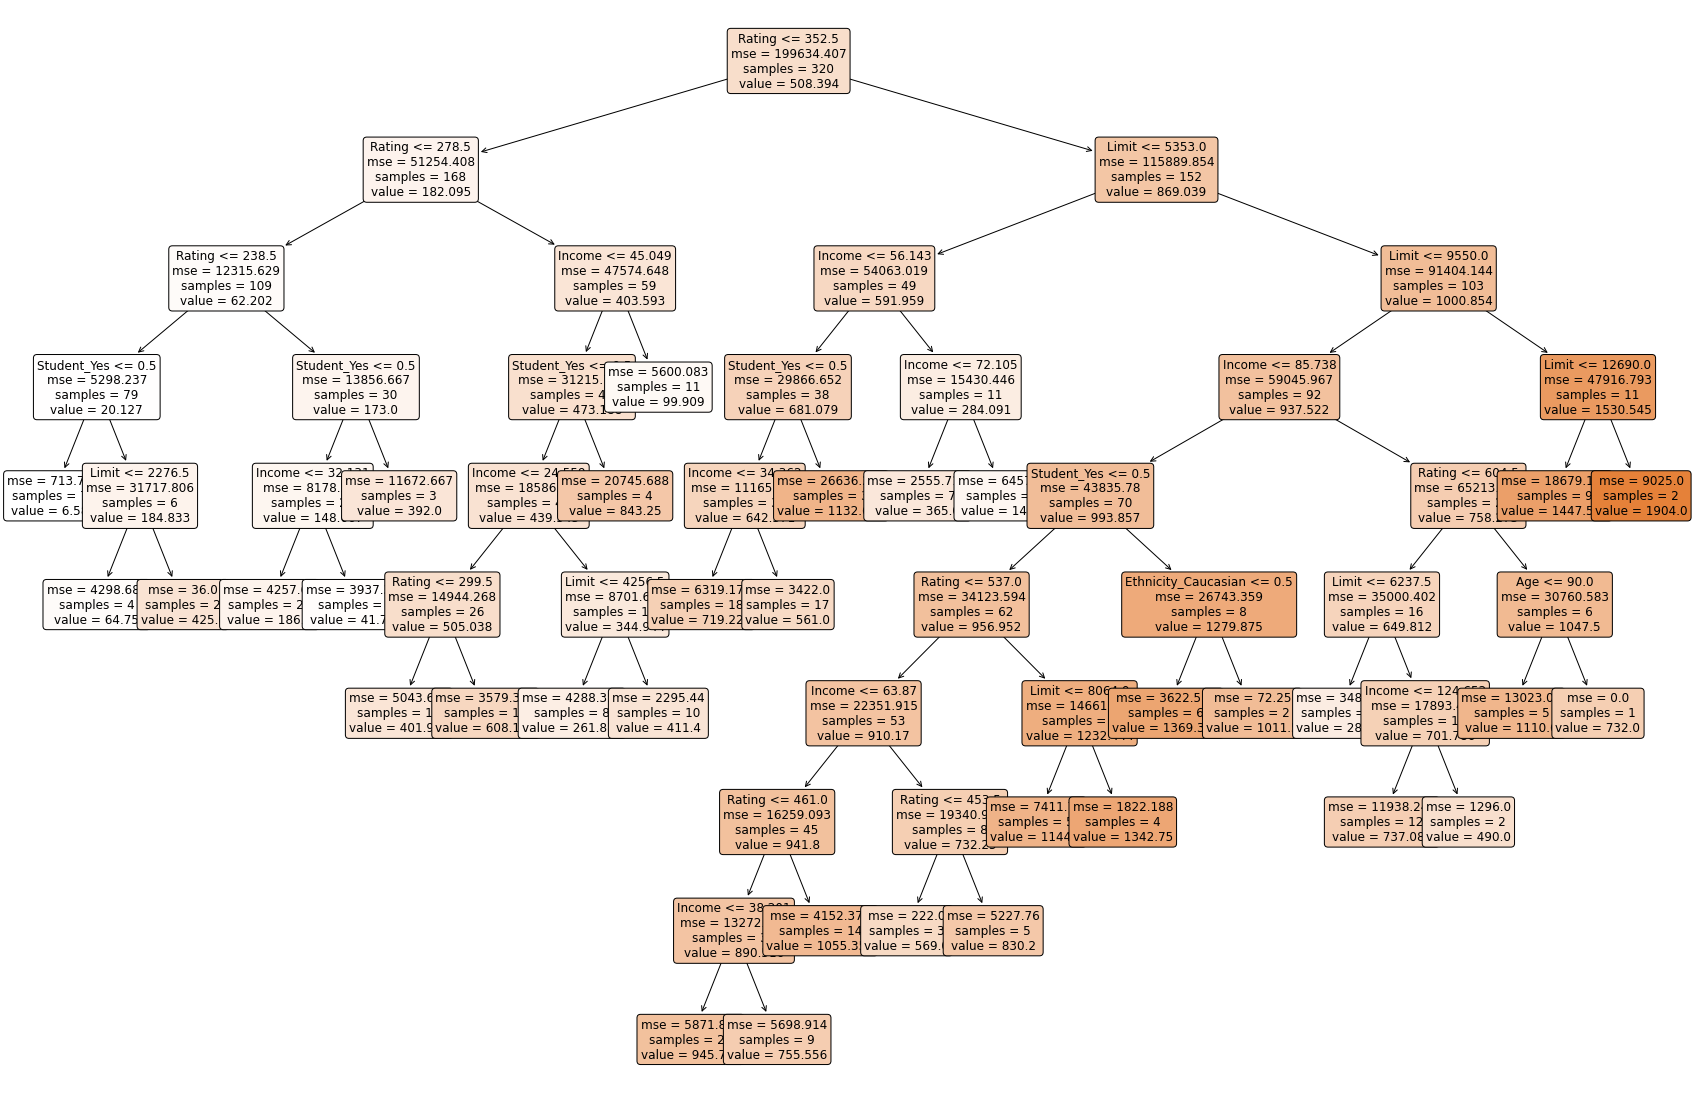

In [42]:
# Plot the tree
plt.figure(figsize=(30,20))   
tree.plot_tree(reg_tree_credit_prunned, filled=True, rounded= True, feature_names=X_train.columns, fontsize=12)
plt.show()

In [43]:
X_train.columns [reg_tree_credit_prunned.feature_importances_!=0]

Index(['Income', 'Limit', 'Rating', 'Age', 'Student_Yes',
       'Ethnicity_Caucasian'],
      dtype='object')

### Random Forest Regression

#### Approach 1 (the theory-based approach): Do not prune the trees and use the OOB error to decide the best parameters

#### Tune both the max_features and the number of trees

In [44]:
print(np.sqrt(X_train.shape[1]))
print(X_train.shape[1]/2)

3.3166247903554
5.5


In [45]:
np.sqrt(11)

3.3166247903554

In [46]:
11/2

5.5

In [47]:
number_of_features=np.arange(3,7) # Letting max_features to range from 3 to 6

In [48]:
number_of_features

array([3, 4, 5, 6])

In [49]:
number_of_trees=np.arange(300,501,10)

In [50]:
mse_scores_rf_oob_matrix= np.empty((number_of_features.size, number_of_trees.size))

In [51]:
r=0
for i in number_of_features:
    c=0
    for j in number_of_trees:
        rf_loop= RandomForestRegressor(n_estimators = j, oob_score= True, max_features=i, random_state=1)
        rf_loop.fit(X_train, y_train)
        mse_scores_rf_oob_matrix[r,c]= mean_squared_error(y_train, rf_loop.oob_prediction_)
        c=c+1
    r= r+1

In [52]:
# Number of features for which the min MSE happens:

number_of_features[np.where(mse_scores_rf_oob_matrix == np.min(mse_scores_rf_oob_matrix))[0]]

array([6])

In [53]:
# Number of trees for which the min MSE happens:

number_of_trees[np.where(mse_scores_rf_oob_matrix == np.min(mse_scores_rf_oob_matrix))[1]]

array([380])

In [54]:
rf= RandomForestRegressor(n_estimators= 380, max_features=6, random_state=1)

In [55]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=6, n_estimators=380, random_state=1)

In [69]:
# Root test MSE

mean_squared_error( y_test,rf.predict (X_test), squared=False)

149.13889537872177

#### Approach 2 (the practice-based approach): Do not prune the trees (similar to approach 1). 

#### The difference with approach 1 is that instead of using the OOB error to decide the best parameters, we can use CV to decide the best parameter.

YOU CAN TRY IT AT HOME!

# Auto dataset

In [56]:
Auto_df=pd.read_csv('C:\\Users\\jheredi2\\Documents\\PythonDataAnalytics\\1-Datasets\\Auto_ISLR.csv')

In [57]:
Auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [58]:
Auto_df.drop(['name'],axis=1,inplace=True)

In [59]:
Auto_df['origin_cat']= pd.cut(Auto_df['origin'], bins=[0,1,2,3], labels=['American','European','Japanese'])

In [60]:
Auto_df.drop(['origin'],axis=1,inplace=True)

In [61]:
Auto_df_dummies=pd.get_dummies(Auto_df,columns=['origin_cat'], drop_first=True)

In [62]:
Auto_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   mpg                  392 non-null    float64
 1   cylinders            392 non-null    int64  
 2   displacement         392 non-null    float64
 3   horsepower           392 non-null    int64  
 4   weight               392 non-null    int64  
 5   acceleration         392 non-null    float64
 6   year                 392 non-null    int64  
 7   origin_cat_European  392 non-null    uint8  
 8   origin_cat_Japanese  392 non-null    uint8  
dtypes: float64(3), int64(4), uint8(2)
memory usage: 22.3 KB


### Multiple Linear Regression

#### Apply ABESS using the whole dataset to select the predictors to include in a multiple linear regression model

In this exercise, the goal is ONLY to select the predictors. 

In [63]:
# We have 8 predictors so .... range (9)

model_auto_abess = abessLm(support_size = range(9))  

In [64]:
# Creating an array with the predictors

Xs_array_auto= np.array(Auto_df_dummies.iloc[:,1:])

In [65]:
# Creating an array with Y

y_array_auto= np.array(Auto_df_dummies['mpg'])

In [66]:
model_auto_abess.fit(Xs_array_auto, y_array_auto)

abessLm(always_select=[], support_size=range(0, 9))

In [67]:
non_zero_indexes_auto = model_auto_abess.coef_!=0

In [68]:
selected_predictors_auto= Auto_df_dummies.iloc[:,1:].columns[non_zero_indexes_auto]
selected_predictors_auto

Index(['weight', 'year', 'origin_cat_European', 'origin_cat_Japanese'], dtype='object')

#### Use the predictors obtained from ABESS to obtain the equation from the training data. 

#### Then, use this equation to obtain the root MSE on the test data

##### Split the data in training and testing (80-20 split)

In [69]:
X_train_au, X_test_au, y_train_au, y_test_au= train_test_split (Auto_df_dummies.iloc[:,1:], Auto_df_dummies['mpg'], test_size=0.2, random_state=1)

Obtain model on training data

In [70]:
multiple_reg_auto= LinearRegression(fit_intercept=True)

In [71]:
multiple_reg_auto.fit(X_train_au[selected_predictors_auto], y_train_au)

LinearRegression()

Get test roor MSE

In [72]:
mean_squared_error( y_test_au, multiple_reg_auto.predict (X_test_au[selected_predictors_auto]), squared=False)

3.4053072185602944

### Regression Trees

#### Use post-prunning via CCP to fit a tree to the training data

#### Then, use this tree to obtain the root MSE on the test data

In [73]:
reg_tree_auto_unprunned= DecisionTreeRegressor(random_state=1)

In [74]:
path= reg_tree_auto_unprunned.cost_complexity_pruning_path(X_train_au, y_train_au)

In [75]:
alphas= path['ccp_alphas']

In [76]:
mse_scores=[]
for i in alphas:
    treeloop= DecisionTreeRegressor(ccp_alpha=i,random_state=1)
    treeloop.fit(X_train_au, y_train_au)
    y_test_predicted=treeloop.predict(X_test_au)
    mse_scores.append(mean_squared_error( y_test_au,y_test_predicted))

In [77]:
indexmin=mse_scores.index(min(mse_scores))

In [78]:
alphas[indexmin]

0.035149855469343766

In [79]:
reg_tree_auto_prunned= DecisionTreeRegressor(ccp_alpha= alphas[indexmin], random_state=1)

In [80]:
reg_tree_auto_prunned.fit(X_train_au, y_train_au)

DecisionTreeRegressor(ccp_alpha=0.035149855469343766, random_state=1)

Get test root MSE for the tree obtained with the training data

In [81]:
mean_squared_error( y_test_au, reg_tree_auto_prunned.predict (X_test_au), squared= False)

3.6801399993565935

Close, but a bit higher (i.e., worse) than the one we got with multiple linear regression

Similarly to the Credit example, the tree is not doing better than regression because it is a huge tree (hugh trees tend not to do well with test data)

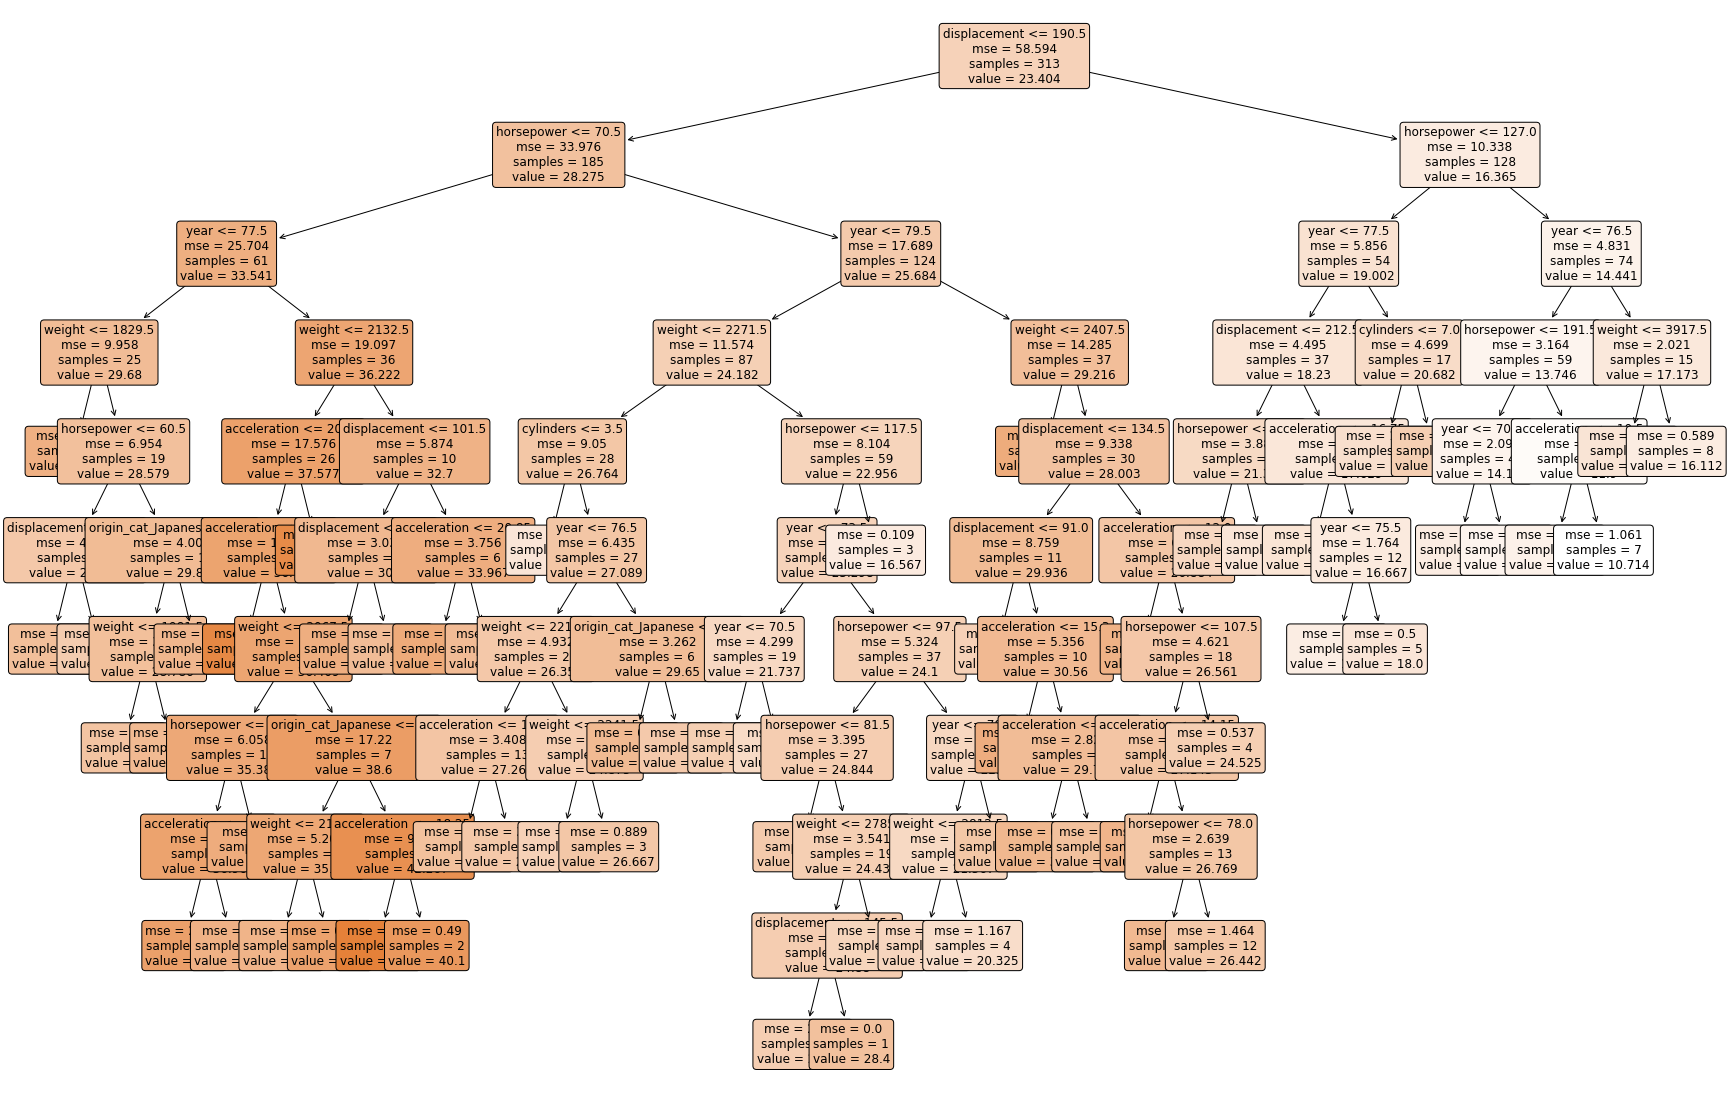

In [82]:
# Plot the tree
plt.figure(figsize=(30,20))   
tree.plot_tree(reg_tree_auto_prunned, filled=True, rounded= True, feature_names=X_train_au.columns, fontsize=12)
plt.show()

### Random Forest Regression

#### Approach 1 (the theory-based approach): Do not prune the trees and use the OOB error to decide the best parameters

#### Tune both the max_features and the number of trees

As we discussed in class yesterday, here I am asking you yo apply approach 1, version 2 (where we tune/select both the number of tree and the max number of features)

In [83]:
print(np.sqrt(X_train_au.shape[1]))
print(X_train_au.shape[1]/2)

2.8284271247461903
4.0


In [84]:
number_of_features=np.arange(2,5) # we are letting this hyperparameter change from 2 to 4

In [85]:
# Since you will be doing this at home where you have more time to run the code, try from 100 to 700

number_of_trees=np.arange(100,701,10)

In [86]:
mse_scores_rf_oob_matrix= np.empty((number_of_features.size, number_of_trees.size))

In [87]:
r=0
for i in number_of_features:
    c=0
    for j in number_of_trees:
        rf_loop= RandomForestRegressor(n_estimators = j, oob_score= True, max_features=i, random_state=1)
        rf_loop.fit(X_train_au, y_train_au)
        mse_scores_rf_oob_matrix[r,c]= mean_squared_error(y_train_au, rf_loop.oob_prediction_)
        c=c+1
    r= r+1

In [88]:
# Number of features for which the min MSE happens:

number_of_features[np.where(mse_scores_rf_oob_matrix == np.min(mse_scores_rf_oob_matrix))[0]]

array([4])

In [89]:
# Number of trees for which the min MSE happens:

number_of_trees[np.where(mse_scores_rf_oob_matrix == np.min(mse_scores_rf_oob_matrix))[1]]

array([510])

From the previous step, I got max_features= 4 and number of trees = 510

In [90]:
rf_auto= RandomForestRegressor(n_estimators= 510, max_features=4, random_state=1)

In [91]:
rf_auto.fit(X_train_au, y_train_au)

RandomForestRegressor(max_features=4, n_estimators=510, random_state=1)

Get the test root MSE for the RF

In [92]:
mean_squared_error( y_test_au,rf_auto.predict (X_test_au), squared=False)

3.288604641001777

A little bit lower (i.e., better) than linear regression. RF returns the lowest test root MSE

Across all the 510 trees that form this forest, what are the most important features/predictors part of it?

In [94]:
df_feature_imp=pd.Series(data=rf_auto.feature_importances_, index=Auto_df_dummies.iloc[:,1:].columns)
df_feature_imp

cylinders              0.194149
displacement           0.296737
horsepower             0.135590
weight                 0.220352
acceleration           0.034200
year                   0.109825
origin_cat_European    0.003887
origin_cat_Japanese    0.005260
dtype: float64